In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import seaborn as sns
import plotly.express as px

import pydicom # for DICOM images
from skimage.transform import resize

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import os
import random
import re
import math
import time
from IPython.display import display_html
import missingno as msno 
import gc
import cv2
import matplotlib.image as mpimg
import warnings

warnings.filterwarnings('ignore') # Disabling warnings for clearer outputs


seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [2]:
# Setting color palette.
black_red = [
    '#1A1A1D', '#4E4E50', '#C5C6C7', '#6F2232', '#950740', '#C3073F'
]

# Setting plot styling.
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('job_skills.csv')

In [4]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


# Data Cleaning

In [5]:
# Change the columns name
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 
                        'Preferred Qualifications': 'Preferred_Qualifications'})

In [6]:
#Checking for null in Dataframe
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

In [7]:
#Replacing Null with NaN
df = df.dropna(how='any',axis='rows')

In [8]:
#Here, first we check is the values_count of each column
df.Company.value_counts()

Company
Google     1212
YouTube      23
Name: count, dtype: int64

In [9]:
#labels
lab = df["Company"].value_counts().keys().tolist()

#values
val = df["Company"].value_counts().values.tolist()

trace1 = go.Pie(labels = lab ,values = val ,marker = dict(colors =  [ "#6F2232" ,"#4E4E50"],
                line = dict(color = "white",
                width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Campany Distribution",
                        plot_bgcolor  = "#1A1A1D",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )



data = [trace1]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Youtube is also part of Google. However, Youtube is not as appealing as working in Google. But Youtube is still a great company. No offence

In [10]:
#Lets drop YouTube
df = df[df.Company != 'YouTube']

In [11]:
#Job Titles
df.Title.value_counts()[:10]

Title
Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Recruiter                                      7
User Experience Design Intern, Summer 2018     7
Partner Sales Engineer, Google Cloud           7
Name: count, dtype: int64

In [12]:
#Location mention in dataset
df.Location.value_counts()[:10]

Location
Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          68
London, United Kingdom               61
San Francisco, CA, United States     49
Singapore                            39
Tokyo, Japan                         31
Sydney, Australia                    31
Seattle, WA, United States           27
Name: count, dtype: int64

In [13]:
#To get only Country
df['Country'] = df['Location'].apply(lambda x : x.split(',')[-1])
df.Country.value_counts()[:15]

Country
 United States     607
 Ireland            87
 United Kingdom     61
 Germany            53
Singapore           39
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              27
 Switzerland        22
 France             20
 Brazil             15
 Poland             11
 Israel             11
Name: count, dtype: int64

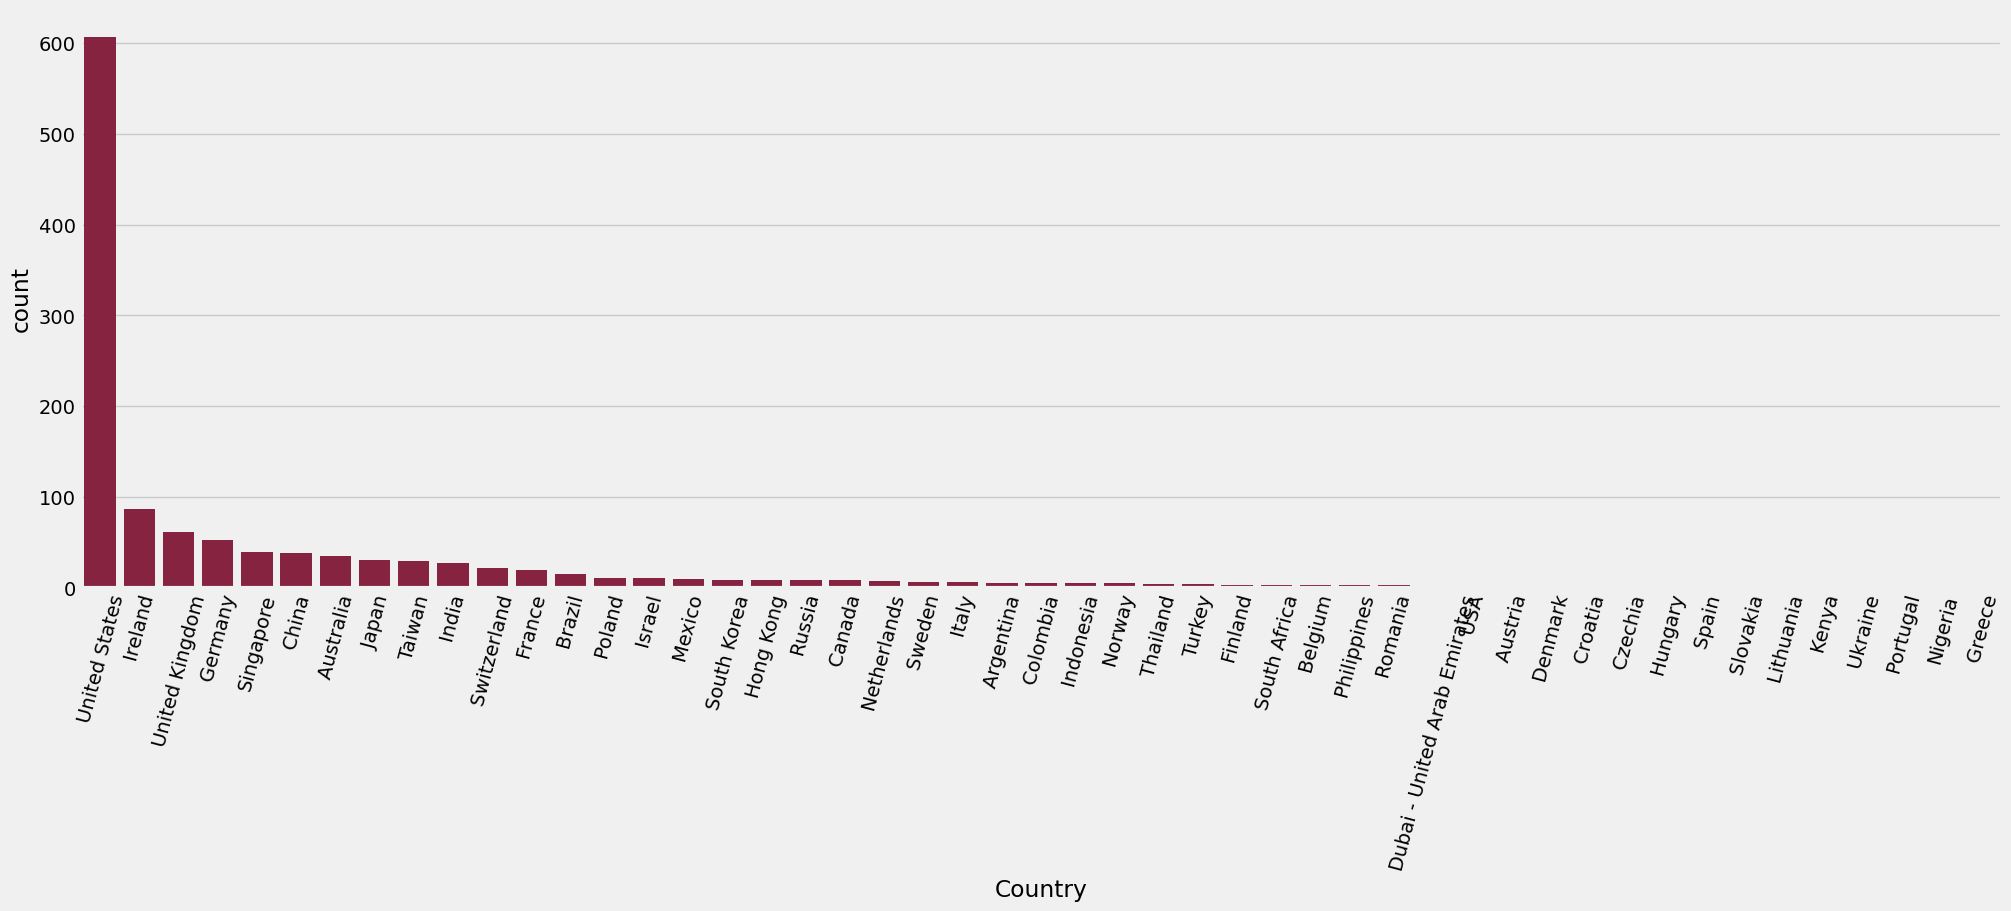

In [14]:

# Assuming df is your DataFrame
df['Country'] = df['Country'].astype(str)  # Convert to pandas object if not already

# Creating a customized chart and giving in figsize etc.
fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Creating a grid:
grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

# Plotting countplot
sns.countplot(x='Country', data=df,
              alpha=0.9, color='#1A1A1D',
              label='Country',
              order=df['Country'].value_counts().index)

sns.countplot(x='Country', data=df,
              alpha=0.7, color='#C3073F',
              label='Country',
              order=df['Country'].value_counts().index)

plt.xticks(rotation=75)
plt.show()


In [15]:
'''Here, lets extract the year of work experience in each position.

The challenge is :

There might be some positions requiring work experience in different field
There might be some positions that don't mention work experience at all'''

"Here, lets extract the year of work experience in each position.\n\nThe challenge is :\n\nThere might be some positions requiring work experience in different field\nThere might be some positions that don't mention work experience at all"

In [16]:
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
# Fill empty list with [0]
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [17]:
df.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,2


In [18]:
df.Minimum_years_experience.describe()

count    1212.000000
mean        2.842409
std         3.301640
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_years_experience, dtype: float64

In [19]:
df.Category.value_counts()[:10]

Category
Sales & Account Management    167
Marketing & Communications    161
Finance                       112
Technical Solutions           100
Business Strategy              92
People Operations              86
User Experience & Design       83
Program Management             72
Partnerships                   58
Product & Customer Support     48
Name: count, dtype: int64

In [20]:
#labels
lab = df["Category"].value_counts().keys().tolist()

#values
val = df["Category"].value_counts().values.tolist()

trace1 = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Category",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace1]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [21]:
pd.set_option('display.max_colwidth', None)
df.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills.",Singapore,3


In [22]:
#Here, I want to extract degree requirement of each rows. Also, the language required for each role.

In [23]:
Degree = ['BA','BS','Bachelor','MBA','Master','PhD']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


In [24]:
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,890
1,BS,860
2,Bachelor,163
3,Master,80
4,MBA,71
5,PhD,8


In [25]:

fig = px.sunburst(data_frame=degree,
                  path=['Degree','Count'],
                  color='Degree',
                  color_discrete_sequence=black_red,
                  maxdepth=-1,
                  title='Degrees Distribution')

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()

# Obviously, most of the positions require basic degree, while some require further education degree, like Master and PhD.Now, I want to see the distribution of the requiring work experience.

Text(0, 0.5, 'Years')

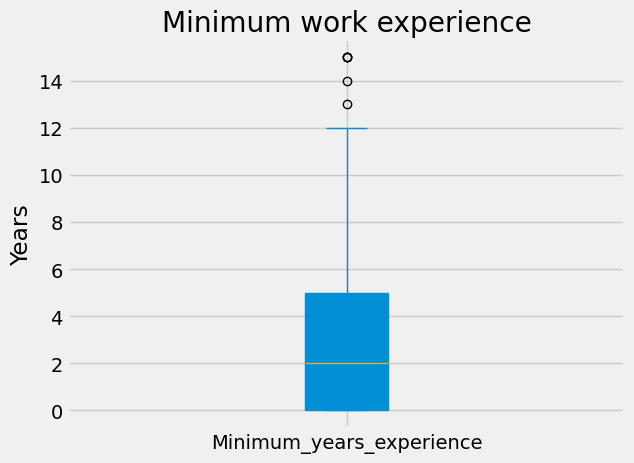

In [26]:
df.Minimum_years_experience.plot(kind='box', patch_artist=True)
plt.title('Minimum work experience')
plt.ylabel('Years')

Well, obviously, there are few outliers. It must be some real senior positions.

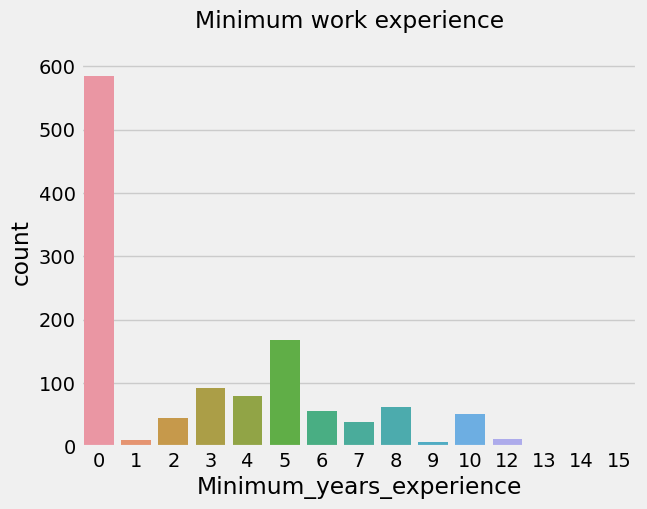

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Minimum_years_experience' is the column name in your DataFrame
sns.countplot(x='Minimum_years_experience', data=df)
plt.suptitle('Minimum work experience')
plt.show()


In [28]:
#Basically, most of the position didn't mention experience. However, I'll dig deeper later.

Programming_Languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 96, 'Java ': 10, 'C#': 15, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go ': 7}


In [29]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,Python,96
1,SQL,69
2,C#,15
3,Ruby,14
4,Java,10
5,PHP,7
6,Go,7
7,Perl,6
8,Javascript,3


In [30]:
fig = px.sunburst(data_frame=language,
                  path=['Language','Count'],
                  color='Language',
                  color_discrete_sequence=black_red,
                  maxdepth=-1,
                  title='Languages Distribution')

fig.update_traces(textinfo='label+text+current path+percent entry+percent parent')
fig.update_layout(margin=dict(t=20, l=0, r=0, b=0))
fig.show()

Text(0.5, 0, 'Count')

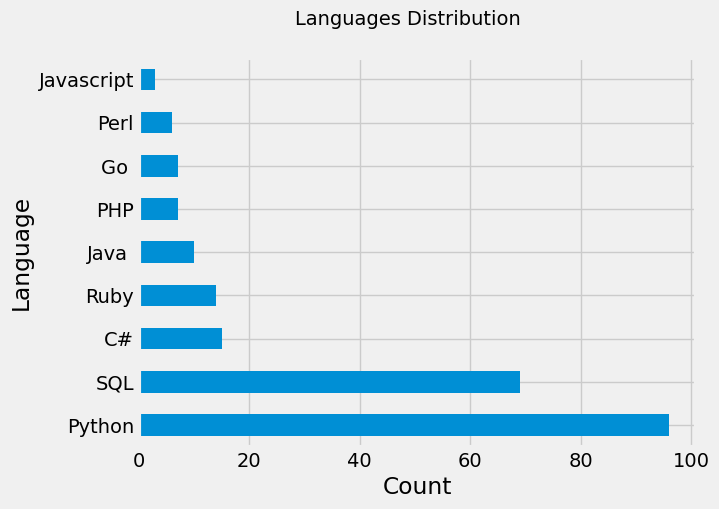

In [31]:
language.plot.barh(x='Language',y='Count',legend=False)
plt.suptitle('Languages Distribution',fontsize=14)
plt.xlabel('Count')

# Python, SQL are also important, which indicates that the growing demand of data analysis

In [32]:
def MadeWordCloud(title,text):
    df_subset = df.loc[df.Title.str.contains(title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

In [33]:
# Refer to https://python-graph-gallery.com/262-worcloud-with-specific-shape/
# https://amueller.github.io/word_cloud/auto_examples/masked.html

df_Analyst = df.loc[df.Title.str.contains('Analyst').fillna(False)]

In [34]:
df_Analyst.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.","Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.",Experience partnering or consulting cross-functionally with senior stakeholders.\nProficiency in a database query language (e.g. SQL).\nAbility to manage multiple projects in an ambiguous environment.\nStrong presentation and communication skills with the ability to communicate statistical concepts and explain recommendations to non-experts.,United States,2


In [35]:
df_Analyst.Country.value_counts()

Country
 United States     40
 Switzerland        6
 Ireland            5
 United Kingdom     4
 India              1
 Germany            1
 France             1
 China              1
 Israel             1
 Japan              1
Singapore           1
Name: count, dtype: int64

In [36]:
Res_AN = ' '.join(df_Analyst['Responsibilities'].tolist())

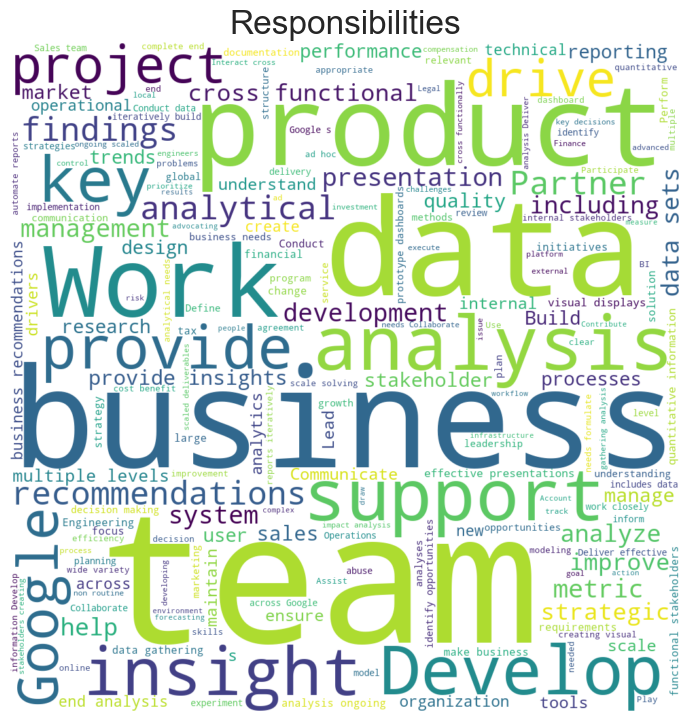

In [37]:
from wordcloud import WordCloud

sns.set(rc={'figure.figsize': (11.7, 8.27)})

G = plt.imread('create_a_Disney_movie_poster_about_MBA_Exam_2023.jpg')

wordcloud = WordCloud(mask=G, background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilities', size=24)
plt.show()

Here we can see some keywords to know more about what a Data Analyst do in Google

Keywords
Criteria : Data/Team/Product/Business/Work
Insight : strategic/quality/key/projects/plan/identify/analysis/action/business/infrastructure
Audience : sales/operation/stakeholders
Verb : maintain/improve/support/model/draw/customize/identify/provide
Characteristic : leadership/quantitative/efficiency
To sum up in a sentence :

Looking for analysts with business and data knowledge, familiar with product to work as a team

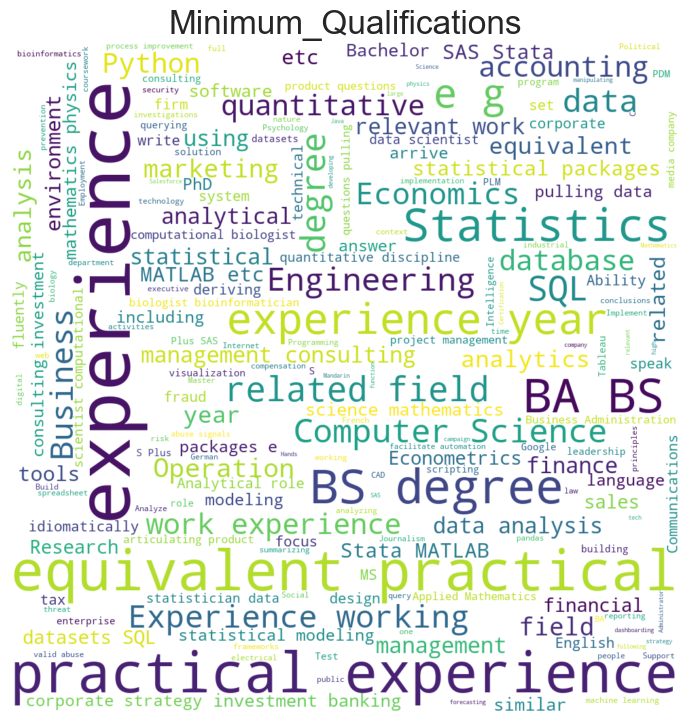

In [38]:
MadeWordCloud('Analyst','Minimum_Qualifications')

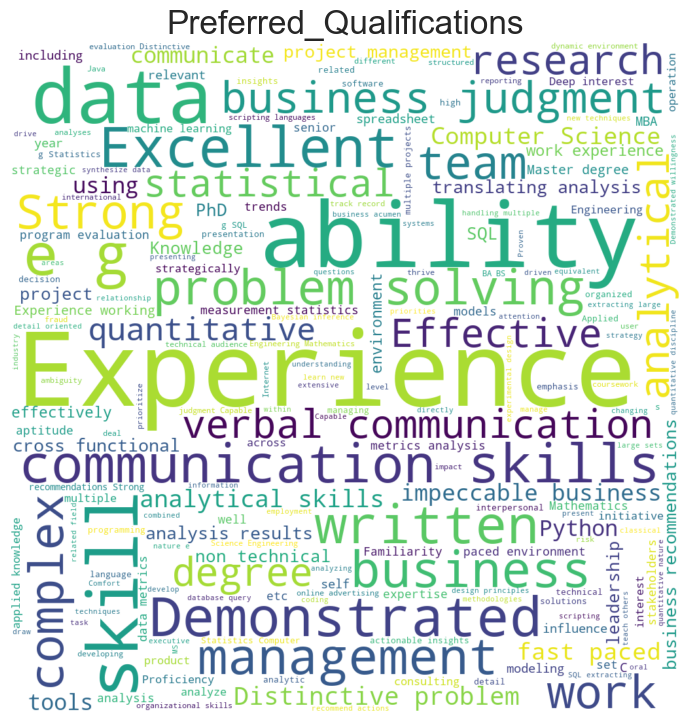

In [39]:
MadeWordCloud('Analyst','Preferred_Qualifications')

# Lets know what Google think about Python vs R

In [40]:
DataSkill = [' R','Python','SQL','SAS']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)

{' R': 14, 'Python': 13, 'SQL': 27, 'SAS': 12}


In [41]:
#And then, the degrees
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 42, 'BS': 41, 'Bachelor': 6, 'MBA': 0, 'Master': 2, 'PhD': 5}


In [42]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 14, 'BS': 5, 'Bachelor': 1, 'MBA': 9, 'Master': 13, 'PhD': 11}


It seems that Google do prefer a further education degree like master or PhD

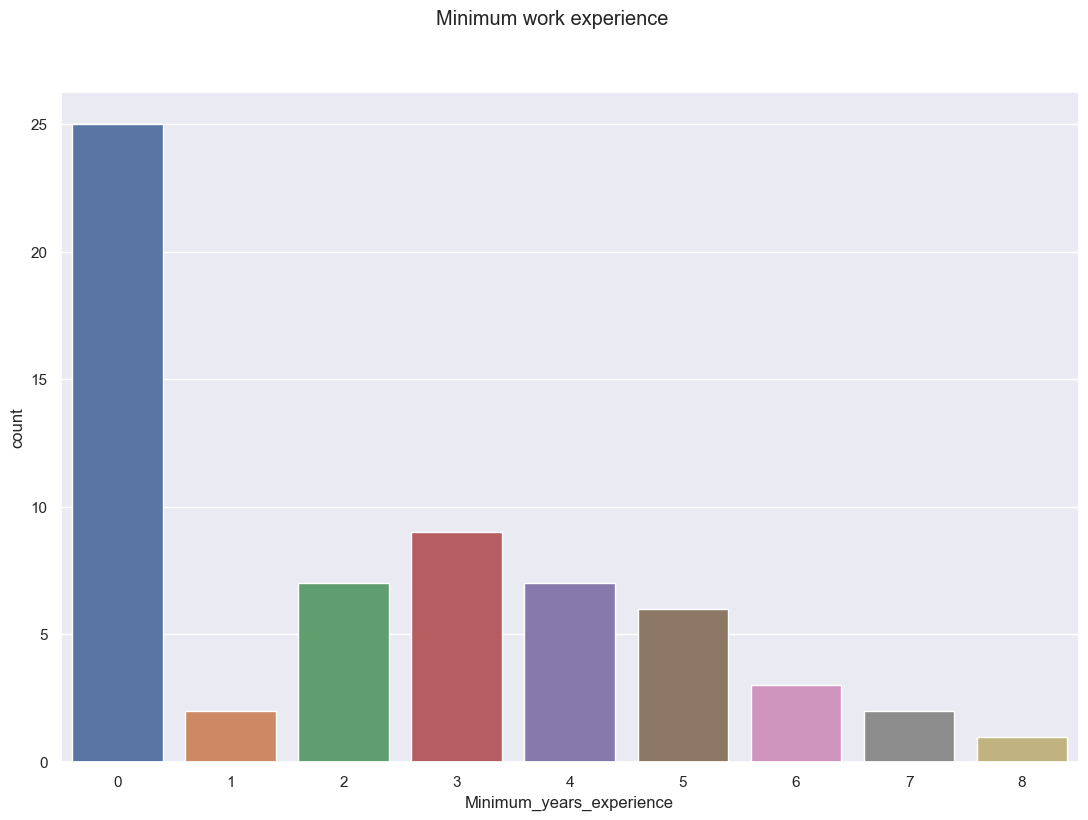

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Minimum_years_experience' is the column name in your DataFrame
sns.countplot(x='Minimum_years_experience', data=df_Analyst)
plt.suptitle('Minimum work experience')
plt.show()


Most of the positions don't require work experience or didn't mention it. However, we can see some of them require 2-5 years experience.

In [44]:
df_Developer = df.loc[df.Title.str.contains('Developer').fillna(False)]
df_Developer.Country.value_counts()

Country
 United States     5
 United Kingdom    3
 Ireland           2
 Japan             2
Name: count, dtype: int64

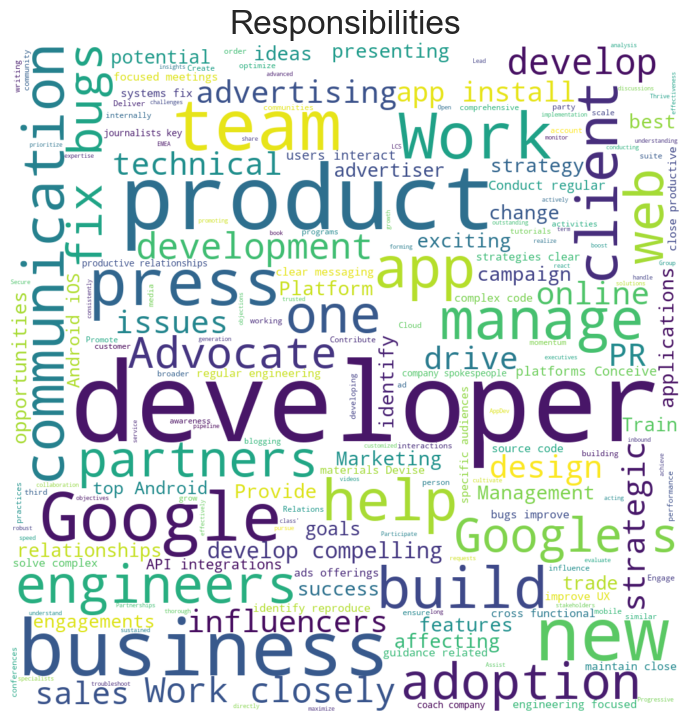

In [45]:
MadeWordCloud('Developer','Responsibilities')

Keywords
Fileds : Business
Skills : Manage/Comunication/Management
Experience : Engineers/Sales/Developer/Android/iOS
I found that the developer positions in Google actually requires some leader's
characteristics! It seems that Google don't want an engineer that only know how 
to code but play a team leader, or even more

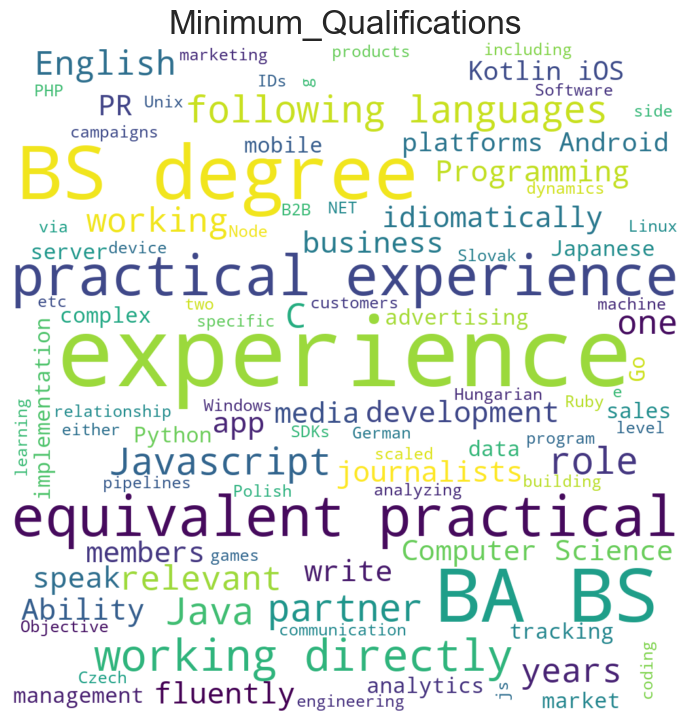

In [46]:
MadeWordCloud('Developer','Minimum_Qualifications')

Keywords
Degrees : BA/BS
Languages : Go/Kotlin/Javascipt/Python/Java
Criteria : practical experience/degree
The main point for this plot is mostly about experience. It seems that the most importanat thing to
be a developer at Google

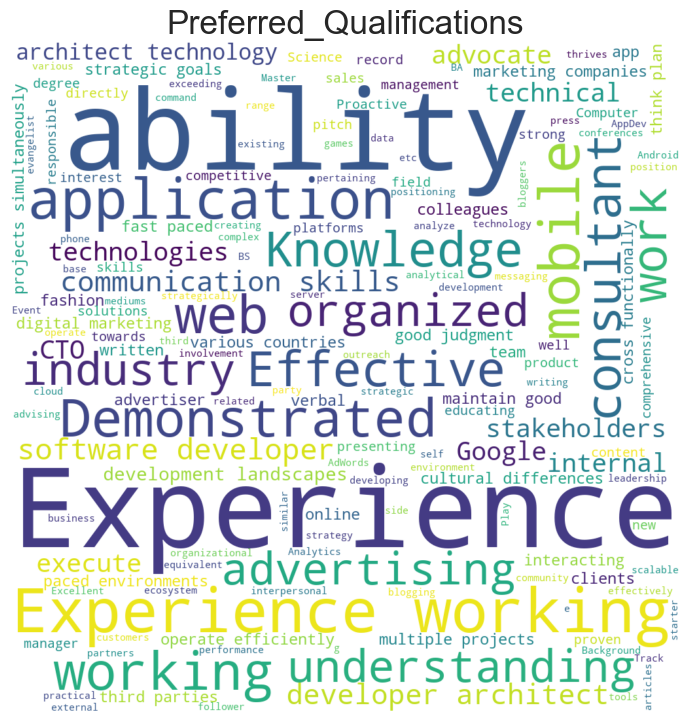

In [47]:
MadeWordCloud('Developer','Preferred_Qualifications')

Keywords
Criteria : Effective/Ability/Knowledge/Experience
I'll sum up this plot by one sentence : Looking for developer that can work effectively and organizedly,
having related experience and knowledge, and understanding industry and stakeholders.

# the languages requirements of developer positions

In [48]:
DataSkill = ['Java ','Javascript','Go ','Python','Kotlin','SQL']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)

{'Java ': 0, 'Javascript': 3, 'Go ': 0, 'Python': 2, 'Kotlin': 3, 'SQL': 0}


In [49]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 12, 'BS': 12, 'Bachelor': 0, 'MBA': 0, 'Master': 0, 'PhD': 0}


In [50]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 1, 'BS': 1, 'Bachelor': 0, 'MBA': 0, 'Master': 1, 'PhD': 0}


Compare to those of Analyst, Google don't actually prefer candidates with a further education degree. 
I guess it's because there are many theories, like mathematics, statistics, calculus required for analysts

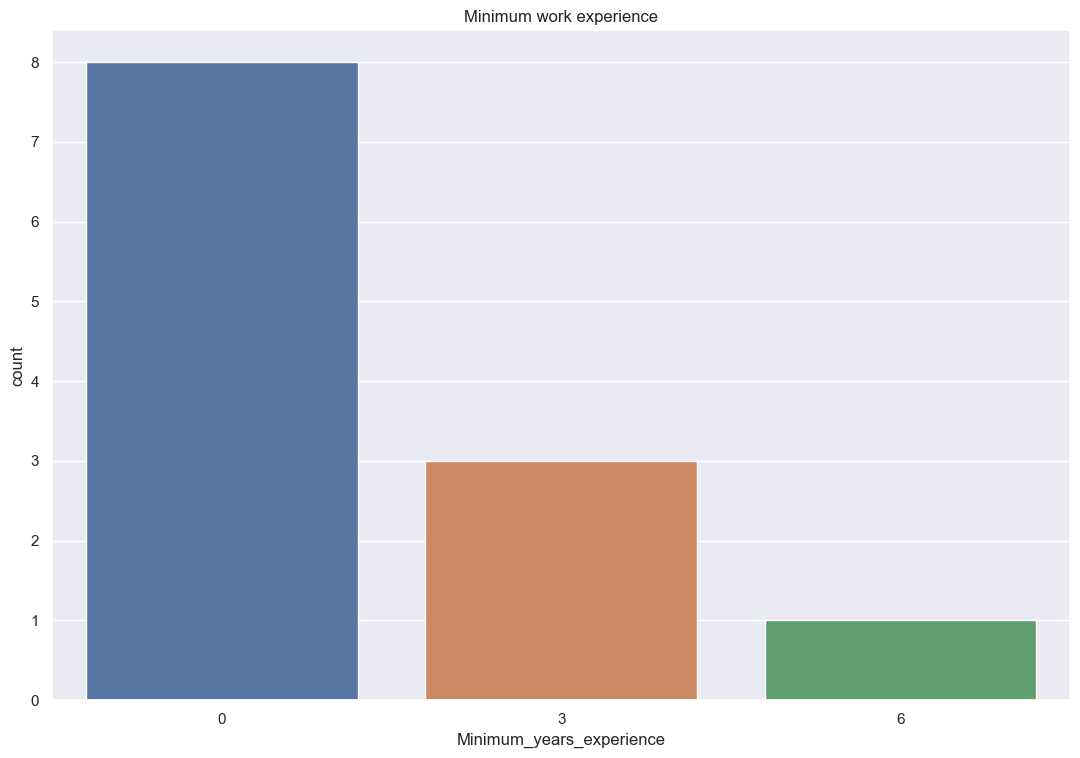

In [51]:
# Assuming 'Minimum_years_experience' is the column name in your DataFrame
sns.countplot(x='Minimum_years_experience', data=df_Developer)
plt.title('Minimum work experience')  # Use plt.title for the title of the count plot
plt.show()


# Data Visualization Tools


I wonder if Google has a preference about the data visualization. There are some leaders in the field,
like Tableau, Power BI, Qlik, and Google Visual Studio. Let me check if these are in the minimum requirements
and preference requirements.

In [52]:
DV_Tools = ['Tableau','Power BI','Qlik','Data Studio','Google Analytics','GA']

DV = dict((x,0) for x in DV_Tools)
for i in DV:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in DV_Tools:
        DV[i] = x
        
print(DV)

{'Tableau': 8, 'Power BI': 0, 'Qlik': 0, 'Data Studio': 1, 'Google Analytics': 5, 'GA': 7}


# It seems that even though Google has Visual Studio made by themselves, Tableau is still taking lead in the field.

# Statistical Analysis Tools

I wonder if Google do prefer any of the statistical analysis tools. In my acknowledge,
there are SPSS, R, Matlab, Excel, Google Spreadsheet, and SAS in this field.

In [53]:
SA_Tools = ['SPSS','R ','Matlab','Excel','Spreadsheet','SAS']

SA = dict((x,0) for x in SA_Tools)
for i in SA:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in SA_Tools:
        SA[i] = x
        
print(SA)

{'SPSS': 6, 'R ': 19, 'Matlab': 4, 'Excel': 0, 'Spreadsheet': 0, 'SAS': 18}


So, there are a variety of preference of statistical analysis tools in Google. However, 
I think most of them prefer R and SAS instead. Still, I'm surprised to see that they do mention SPSS in the requriement.

# Pivot tables

In [54]:
df_groupby_country_category = df.groupby(['Country','Category'])['Category'].count()

In [55]:
df_groupby_country_category.loc[' United States']

Category
Administrative                       7
Business Strategy                   75
Data Center & Network                2
Developer Relations                  2
Finance                             79
Hardware Engineering                16
IT & Data Management                 1
Legal & Government Relations        15
Manufacturing & Supply Chain         4
Marketing & Communications          88
Partnerships                        28
People Operations                   56
Product & Customer Support          18
Program Management                  46
Real Estate & Workplace Services    14
Sales & Account Management          42
Sales Operations                    12
Software Engineering                 8
Technical Infrastructure             7
Technical Solutions                 17
Technical Writing                    5
User Experience & Design            65
Name: Category, dtype: int64

# In this way, I can more thoroughly see the distribution of positions in each country.

In [56]:
category_country = df.pivot_table(index=['Country','Category'],values='Minimum_years_experience',aggfunc='median')

In [57]:
category_country.loc[' United States']

,Minimum_years_experience
Category,
Administrative,0.0
Business Strategy,2.0
Data Center & Network,7.5
Developer Relations,0.0
Finance,4.0
Hardware Engineering,5.0
IT & Data Management,2.0
Legal & Government Relations,4.0
Manufacturing & Supply Chain,6.5


In [58]:
category_country.loc[' India']

,Minimum_years_experience
Category,
Marketing & Communications,8.0
Partnerships,8.0
People Operations,5.0
Product & Customer Support,6.0
Program Management,4.0
Sales & Account Management,12.0
Sales Operations,8.0
Software Engineering,5.0
Technical Solutions,1.5


#We can see that the people in Legal dept required more experience than other. 
#And so does the Supply Chain dept in the US.